In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn import svm

%matplotlib inline

seed = 42

df=pd.read_csv("cervical_cancer.csv")
len(df)

858

In [2]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df.describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858,858,858,858,858,858,858,858,858,...,858.0,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
unique,NaN,13,22,12,3,31,63,3,41,3,...,19.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,272,163,270,722,722,722,481,269,658,...,787.0,787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26.820513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# replace "?" with "0"
df = df.replace("?", 0)

In [10]:
# Split data into training and testing sets
y = df["Biopsy"]
X = df.drop(["Biopsy"], axis=1)
X = df.drop(["Citology"], axis=1)
X = df.drop(["Schiller"], axis=1)
X = df.drop(["Hinselmann"], axis=1)
# 20% of dataset goes to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [11]:
#Standardize the data
X_scaled = preprocessing.scale(X_train)
print(X_scaled.mean())
print(X_scaled.std())

-1.5277704595424894e-17
0.9561828874675149


/home/leloy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by the scale function.
  


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [13]:
#Evaluating the classifier using training set
from sklearn.metrics import accuracy_score
gbcy_pred=gbc.predict(X_test)
accuracy_score(gbcy_pred, y_test)

1.0

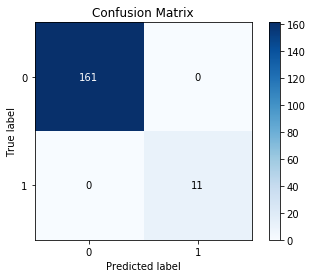

In [14]:
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=gbcy_pred)
plt.show()

In [9]:
import _pickle as cPickle
# save the classifier
with open('cervical_cancer_classifier.pkl', 'wb') as fid:
    cPickle.dump(gbc, fid) 

In [10]:
# load it again
with open('cervical_cancer_classifier.pkl', 'rb') as fid:
    gnb_loaded = cPickle.load(fid)